In [1]:
import pandas as pd
from  mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

df = pd.read_excel("cafe_transaction.xlsx") 
#df = pd.read_csv(file_path, encoding='latin1')

# Step 1: Ensure products column is a list of items
df['products'] = df['products'].str.split(',')

# Step 2: One-hot encoding of transactions
unique_products = set(item for sublist in df['products'] for item in sublist)
encoded_data = {product: df['products'].apply(lambda x: product in x) for product in unique_products}
df_encoded = pd.DataFrame(encoded_data)


C:\Users\SNEHA GAWAS\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SNEHA GAWAS\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SNEHA GAWAS\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SNEHA GAWAS\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtyp

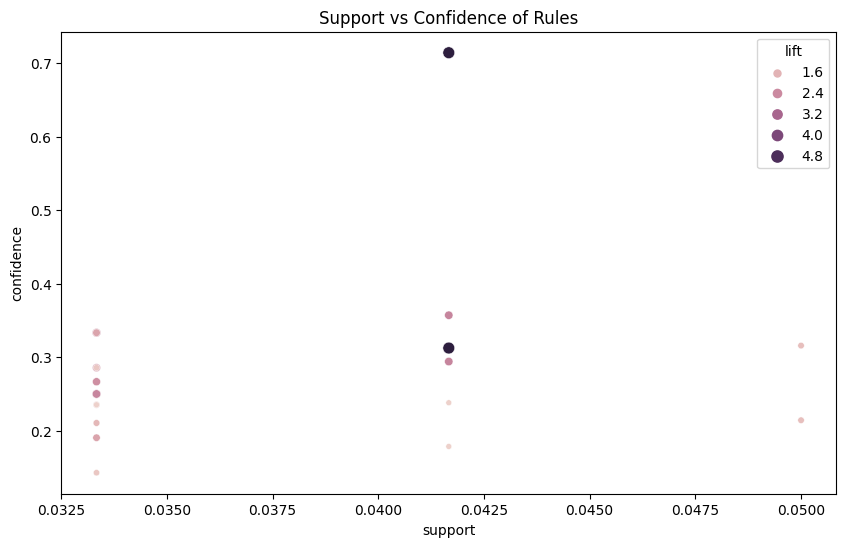

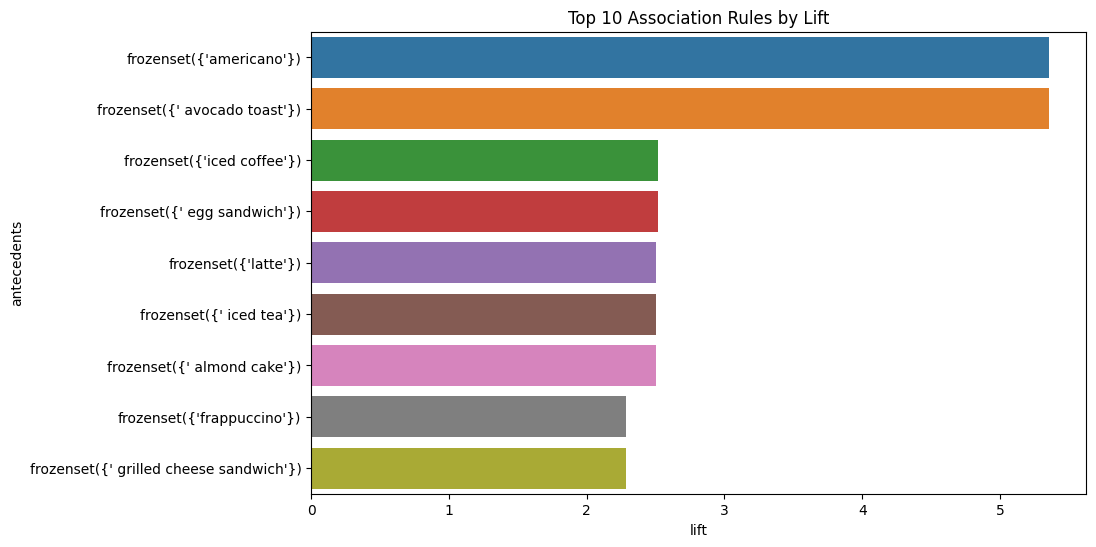

In [2]:
# Step 3: Apply the Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)

# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 5: Visualize results (Support vs Confidence)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules)
plt.title('Support vs Confidence of Rules')
plt.savefig('./support_vs_confidence.png')  

# Step 6: Visualize top 10 association rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='antecedents', data=top_rules)
plt.title('Top 10 Association Rules by Lift')
plt.savefig('./top_10_rules_by_lift.png')  


In [3]:
# Step 7: Display combinations of products with support and confidence
rules['product_combination'] = rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str)

# Filter for strong rules (you can adjust these thresholds)
strong_rules = rules[(rules['support'] >= 0.01) & (rules['confidence'] >= 0.05)]

# Generate a summary of product combinations
summary_combinations = strong_rules[['product_combination', 'support', 'confidence']]

# Check if there are strong combinations found
if not summary_combinations.empty:
    # Print the summary
    print('The following combinations can be bought together to enhance customer engagement and revenue growth:')
    for index, row in summary_combinations.iterrows():
        print(f"Combination: {row['product_combination']}, Support: {row['support']:.2f}, Confidence: {row['confidence']:.2f}")
else:
    print("No strong product combinations found.")


# Save the rules as CSV
rules.to_csv('./association_rules.csv', index=False)


The following combinations can be bought together to enhance customer engagement and revenue growth:
Combination: frozenset({'frappuccino'}) -> frozenset({' grilled cheese sandwich'}), Support: 0.03, Confidence: 0.27
Combination: frozenset({' grilled cheese sandwich'}) -> frozenset({'frappuccino'}), Support: 0.03, Confidence: 0.29
Combination: frozenset({'americano'}) -> frozenset({' avocado toast'}), Support: 0.04, Confidence: 0.31
Combination: frozenset({' avocado toast'}) -> frozenset({'americano'}), Support: 0.04, Confidence: 0.71
Combination: frozenset({'latte'}) -> frozenset({' iced tea'}), Support: 0.03, Confidence: 0.25
Combination: frozenset({' iced tea'}) -> frozenset({'latte'}), Support: 0.03, Confidence: 0.33
Combination: frozenset({' almond cake'}) -> frozenset({'latte'}), Support: 0.03, Confidence: 0.33
Combination: frozenset({'latte'}) -> frozenset({' almond cake'}), Support: 0.03, Confidence: 0.25
Combination: frozenset({' egg sandwich'}) -> frozenset({' blueberry muffi